# <font color=darkblue> Machine Learning model deployment with Flask framework</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with the help of the flask framework.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2. Load the dataset

In [2]:
df = pd.read_csv('car data.csv')

### 3. Check the shape and basic information of the dataset.

In [5]:
print(df.shape)

(301, 9)


In [7]:
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [9]:
print(df.info())
print('Descriibe:',df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Descriibe:               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.10

### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [10]:
# Check duplicate values
print('Duplicated:',df.duplicated().sum())

Duplicated: 2


In [11]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(299, 9)

### 5. Drop the columns which you think redundant for the analysis.

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
# Drop the car name column
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [17]:
from datetime import date

# Get the current year
current_year = date.today().year

# Calculate the age of the car
final_dataset['age_of_the_car'] = current_year - final_dataset['Year']

In [19]:
final_dataset.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7


In [20]:
# drop the year column
final_dataset.drop('Year', axis=1, inplace=True) # axis=1 for column and inplace=True for permanent changes to final_dataset

In [21]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'age_of_the_car'],
      dtype='object')

### 7. Encode the categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create a dictionary to store the mapping from labels to numbers for each column
label_mapping = {}

# Automatically select columns of type 'object'
columns_to_encode = final_dataset.select_dtypes(include=['object']).columns

for column in columns_to_encode:
    final_dataset[column] = le.fit_transform(final_dataset[column])
    label_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label_mapping dictionary
for column, mapping in label_mapping.items():
    print(f'{column}: {mapping}')

Fuel_Type: {'CNG': 0, 'Diesel': 1, 'Petrol': 2}
Seller_Type: {'Dealer': 0, 'Individual': 1}
Transmission: {'Automatic': 0, 'Manual': 1}


In [27]:
final_dataset.head(35)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,2,0,1,0,10
1,4.75,9.54,43000,1,0,1,0,11
2,7.25,9.85,6900,2,0,1,0,7
3,2.85,4.15,5200,2,0,1,0,13
4,4.60,6.87,42450,1,0,1,0,10
5,9.25,9.83,2071,1,0,1,0,6
6,6.75,8.12,18796,2,0,1,0,9
7,6.50,8.61,33429,1,0,1,0,9
8,8.75,8.89,20273,1,0,1,0,8
9,7.45,8.92,42367,1,0,1,0,9


### 8. Separate the target and independent features.

In [28]:
# Seperate the target and the independent variables
X = final_dataset.drop('Selling_Price', axis=1)
y = final_dataset['Selling_Price']

### 9. Split the data into train and test.

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the r2_score for the train and test sets
r2_train = r2_score(y_train, rf.predict(X_train))
r2_test = r2_score(y_test, y_pred)

print(f'Train r2 score: {r2_train}')
print(f'Test r2 score: {r2_test}')

Train r2 score: 0.9856305226349797
Test r2 score: 0.5777259891991424


The r2 score for the training set is very high (0.9856), which indicates that the model fits the training data very well. However, the r2 score for the test set is significantly lower (0.5777), which suggests that the model is not generalizing well to unseen data. This is a classic sign of overfitting and to overcome this applying cross-validation method, a powerful preventative measure against overfitting.


In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=5)

# Print the scores
print(f'Cross-validation scores: {scores}')

# Print the mean score
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [ 0.96420827  0.74293268 -1.66522337  0.95426016  0.77835328]
Mean cross-validation score: 0.35490620138279255


In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Create a dictionary of different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet()
}

# Train each model and calculate the cross-validation score
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{model_name} cross-validation scores: {scores}')
    print(f'{model_name} mean cross-validation score: {scores.mean()}')

Linear Regression cross-validation scores: [   0.83936062    0.76650938 -106.57394676    0.60661231    0.83882446]
Linear Regression mean cross-validation score: -20.704527997696054
Ridge Regression cross-validation scores: [   0.8434481     0.76546155 -105.20040206    0.61297351    0.8405628 ]
Ridge Regression mean cross-validation score: -20.427591218305956
Lasso Regression cross-validation scores: [  0.86628922   0.71524629 -98.51069998   0.65265659   0.73811595]
Lasso Regression mean cross-validation score: -19.107678386099302
ElasticNet cross-validation scores: [   0.87019332    0.7238951  -101.80713712    0.69414441    0.76253767]
ElasticNet mean cross-validation score: -19.75127332562447


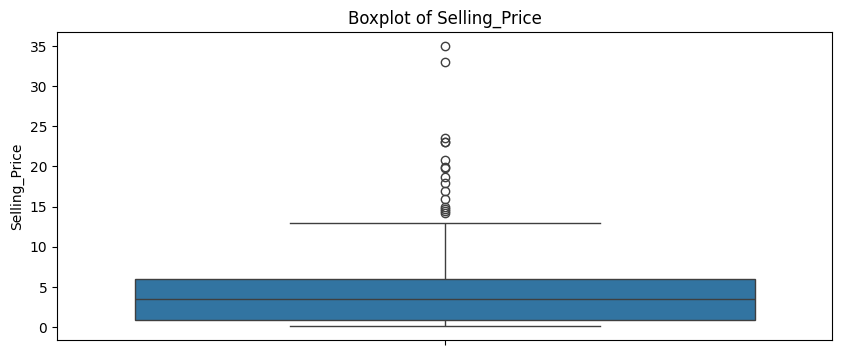

Descriptive statistics for Selling_Price:
count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64



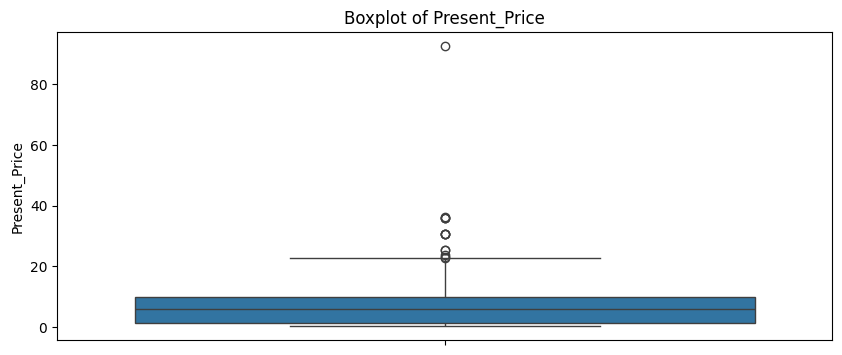

Descriptive statistics for Present_Price:
count    299.000000
mean       7.541037
std        8.567887
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
max       92.600000
Name: Present_Price, dtype: float64



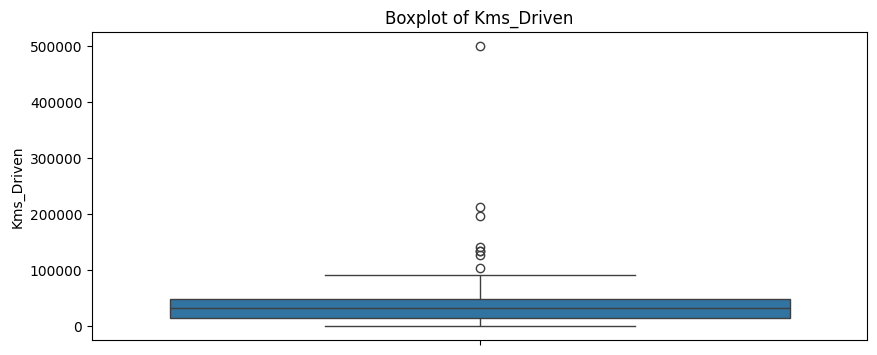

Descriptive statistics for Kms_Driven:
count       299.000000
mean      36916.752508
std       39015.170352
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48883.500000
max      500000.000000
Name: Kms_Driven, dtype: float64



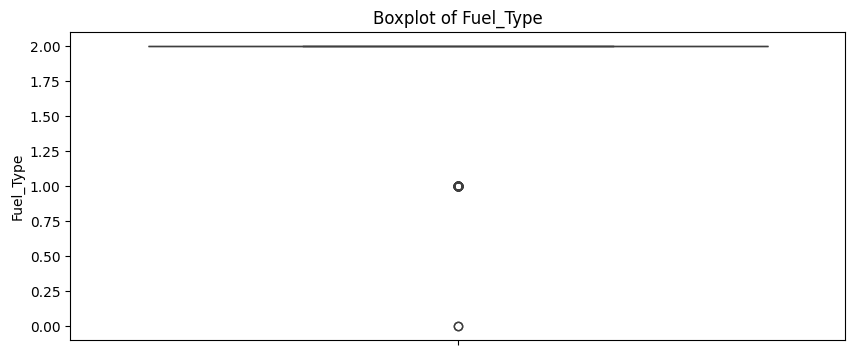

Descriptive statistics for Fuel_Type:
count    299.000000
mean       1.792642
std        0.422297
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Fuel_Type, dtype: float64



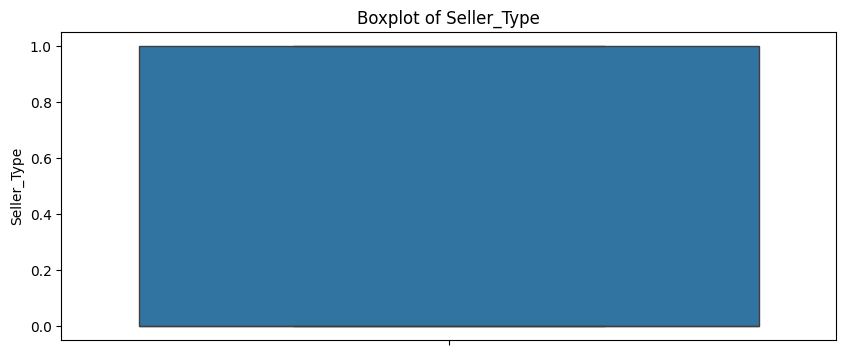

Descriptive statistics for Seller_Type:
count    299.000000
mean       0.354515
std        0.479168
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Seller_Type, dtype: float64



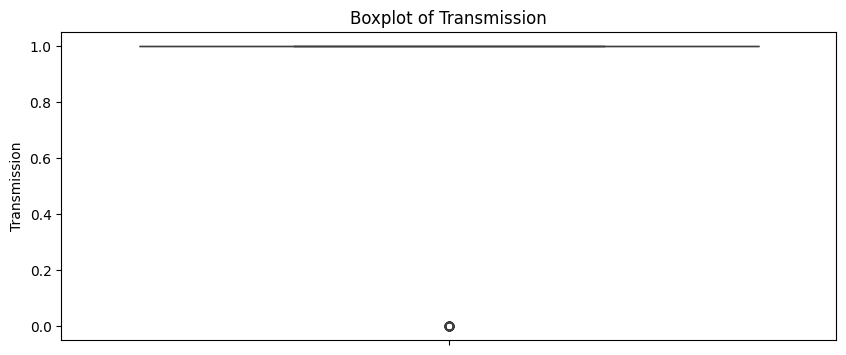

Descriptive statistics for Transmission:
count    299.000000
mean       0.869565
std        0.337346
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Transmission, dtype: float64



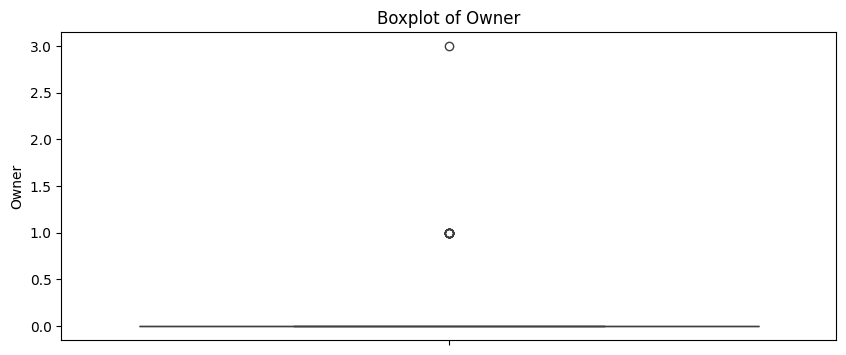

Descriptive statistics for Owner:
count    299.000000
mean       0.043478
std        0.248720
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: Owner, dtype: float64



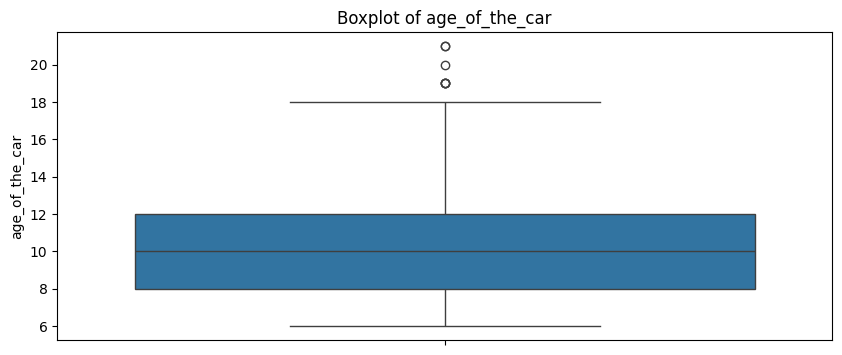

Descriptive statistics for age_of_the_car:
count    299.000000
mean      10.384615
std        2.896868
min        6.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       21.000000
Name: age_of_the_car, dtype: float64



In [35]:
# Create a boxplot and print descriptive statistics for each column
for column in columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(y=final_dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    # Print descriptive statistics
    print(f'Descriptive statistics for {column}:\n{final_dataset[column].describe()}\n')

In [36]:
# Get a list of all column names
columns = final_dataset.columns

# Print descriptive statistics for each column
for column in columns:
    print(f'Descriptive statistics for {column}:\n{final_dataset[column].describe()}\n')

Descriptive statistics for Selling_Price:
count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

Descriptive statistics for Present_Price:
count    299.000000
mean       7.541037
std        8.567887
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
max       92.600000
Name: Present_Price, dtype: float64

Descriptive statistics for Kms_Driven:
count       299.000000
mean      36916.752508
std       39015.170352
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48883.500000
max      500000.000000
Name: Kms_Driven, dtype: float64

Descriptive statistics for Fuel_Type:
count    299.000000
mean       1.792642
std        0.422297
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Fuel_Type, dtype: float64

Descriptive statistics for Seller_

In [37]:
# Open the output file
with open('output.txt', 'w') as f:
    # Write descriptive statistics for each column to the file
    for column in columns:
        f.write(f'Descriptive statistics for {column}:\n{final_dataset[column].describe()}\n\n')

In [38]:
# Based on output.txt treaing the outliers
# List of columns to treat outliers
outlier_columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Treat outliers for each column
for column in outlier_columns:
    # Calculate the IQR of the column
    Q1 = final_dataset[column].quantile(0.25)
    Q3 = final_dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = final_dataset[(final_dataset[column] < lower_bound) | (final_dataset[column] > upper_bound)]

    # Replace the outliers with the median of the column
    final_dataset[column] = np.where((final_dataset[column] < lower_bound) | (final_dataset[column] > upper_bound), final_dataset[column].median(), final_dataset[column])

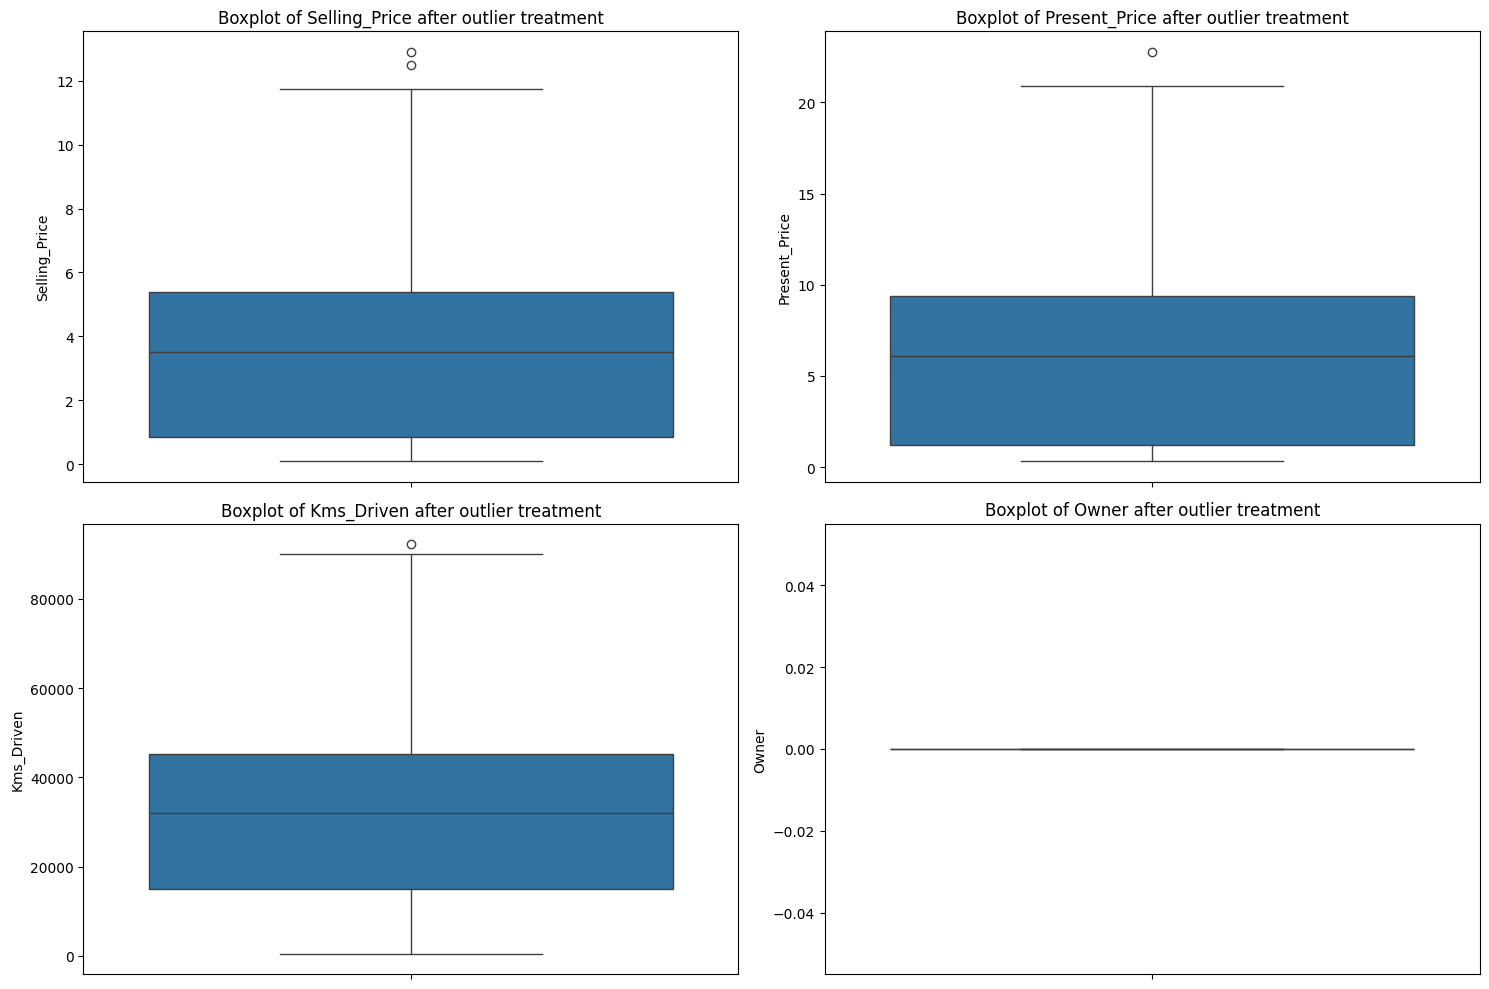

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Create a boxplot for each column
for i, column in enumerate(outlier_columns):
    sns.boxplot(y=final_dataset[column], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Boxplot of {column} after outlier treatment')

plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = final_dataset.drop('Selling_Price', axis=1)  # assuming 'Selling_Price' is the target
y = final_dataset['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use your code to train the model and make predictions

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the r2_score for the train and test sets
r2_train = r2_score(y_train, rf.predict(X_train))
r2_test = r2_score(y_test, y_pred)

print(f'Train r2 score: {r2_train}')
print(f'Test r2 score: {r2_test}')

Train r2 score: 0.9842037174092366
Test r2 score: 0.8832641397712329


In [50]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf)

# Save the model to disk
with open('random_forest_model.pkl', 'wb') as file:
    file.write(saved_model)

In [47]:
import sklearn
print(sklearn.__version__)

1.4.0


### 11. Create a pickle file with an extension as .pkl

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

In [ ]:
# Done  

In [46]:
X_train.columns

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'age_of_the_car'],
      dtype='object')

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [ ]:
# Done

### b) Create app.py file and write the predict function

In [ ]:
# Done

### 13. Run the app.py python file which will render to index html page then enter the input values and get the prediction.

In [ ]:
# Done & found to be working fine

### Happy Learning :)